In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon, iradon
from skimage.draw import ellipse

In [2]:
def plot_phantom(phantom: np.ndarray) -> plt.Figure:
    fig = plt.Figure()
    axes = fig.gca()
    ax = axes.imshow(phantom, cmap=plt.get_cmap("hot"), vmax=1, vmin=0)
    plt.colorbar(ax)
    return fig

In [3]:
def plot_radon_transform(radon_transform: np.ndarray, theta: np.ndarray) -> plt.Figure:
    fig = plt.Figure()
    axes = fig.gca()
    ax = axes.imshow(
        radon_transform,
        cmap=plt.cm.get_cmap("hot"),
        aspect='auto',
        extent=[theta[0], theta[-1], 125, -125]
    )
    plt.colorbar(ax)
    return fig

In [4]:
def plot_single_degree_radon_transform(radon_transform: np.ndarray, degree: int, theta: np.ndarray) -> plt.Figure:
    if degree not in theta:
        return None
    idx = np.where(theta == degree)
    fig = plt.Figure()
    axes = fig.gca()
    axes.plot(radon_transform[:, idx[0]])
    return fig

In [5]:
def plot_inverse_radon(iphantom: np.ndarray) -> plt.Figure:
    fig = plt.Figure()
    axes = fig.gca()
    ax = axes.imshow(
        iphantom,
        cmap=plt.cm.get_cmap("hot"),
        aspect='auto',
        vmin=0,
        vmax=1
    )
    plt.colorbar(ax)
    return fig

In [6]:
# Intensidad. I ∈ [-1; 1]
I = 1

# Inclinación
A = 0

# Semi-eje X. X ∈ (0; 1]
X = 0

# Semi-eje Y. Y ∈ (0; 1]
Y = 0

# Centro X. CX ∈ [-1; 1]
CX = 0

# Centro Y. CY ∈ [-1; 1]
CY = 0

In [7]:
def new_phantom() -> np.ndarray:
   phantom = np.zeros((250, 250))
   return phantom

In [8]:
def new_ellipse(
    phantom: np.ndarray,
    I: int,
    A: int,
    X: int,
    Y: int,
    CX: int,
    CY: int
) -> tuple[np.ndarray, np.ndarray, int]:
    
    rad_A = A*np.pi/180
    
    scaled_X = (X * phantom.shape[1])/2
    scaled_Y = (Y * phantom.shape[0])/2

    scaled_CX = (CX * phantom.shape[1]/2) + phantom.shape[1]/2
    scaled_CY = phantom.shape[0] - ((CY * phantom.shape[0]/2) + phantom.shape[0]/2)
    
    rr, cc = ellipse(r=scaled_CY, c=scaled_CX, r_radius=scaled_Y, c_radius=scaled_X, rotation=rad_A, shape=phantom.shape)
    
    return rr, cc, I

In [9]:
def add_ellipse(phantom: np.ndarray, ellipse: tuple[np.ndarray, np.ndarray, int]) -> np.ndarray:
    rr, cc, I = ellipse
    phantom[rr, cc] = I
    return phantom

/tmp/ipykernel_7999/4255785446.py:5: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  plt.colorbar(ax)


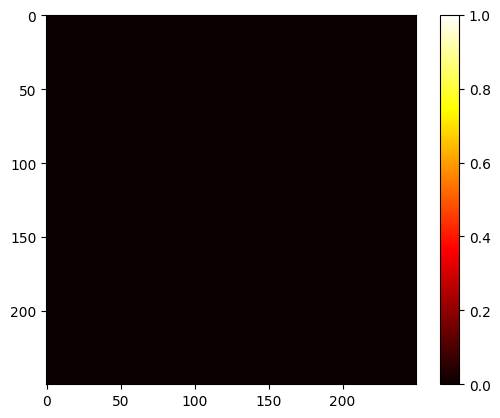

<Figure size 640x480 with 0 Axes>

In [10]:
phantom = new_phantom()
plot_phantom(phantom)

/tmp/ipykernel_7999/4255785446.py:5: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  plt.colorbar(ax)


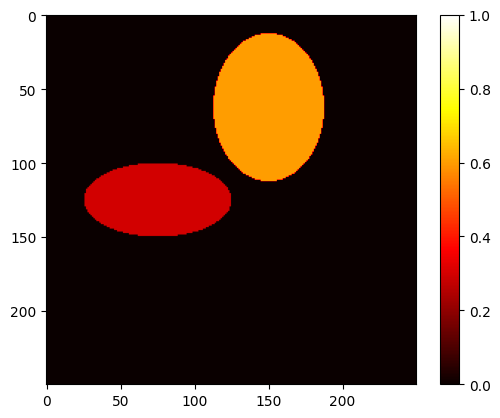

<Figure size 640x480 with 0 Axes>

In [11]:
ellipse1 = new_ellipse(phantom, .3, 90, X=0.2, Y=0.4, CX=-0.4, CY=0)
ellipse2 = new_ellipse(phantom, .6, 0, X=0.3, Y=0.4, CX=0.2, CY=0.5)
phantom = add_ellipse(phantom, ellipse1)
phantom = add_ellipse(phantom, ellipse2)
plot_phantom(phantom)

In [12]:
def calculate_radon_transform(phantom: np.ndarray, start: int, step: int, end: int) -> tuple[np.ndarray, np.ndarray]:
    theta = np.array(list(range(start, end, step)))
    radon_transform = radon(phantom, theta)
    return radon_transform, theta

In [13]:
radon_transform, theta = calculate_radon_transform(phantom, start=0, step=10, end=180)

/tmp/ipykernel_7999/3703279406.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap("hot"),
/tmp/ipykernel_7999/3703279406.py:10: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  plt.colorbar(ax)


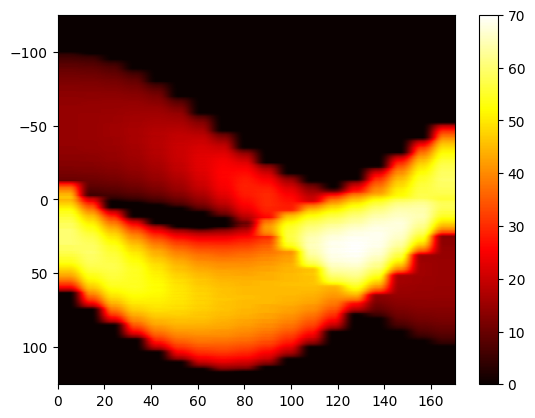

<Figure size 640x480 with 0 Axes>

In [14]:
plot_radon_transform(radon_transform, theta)

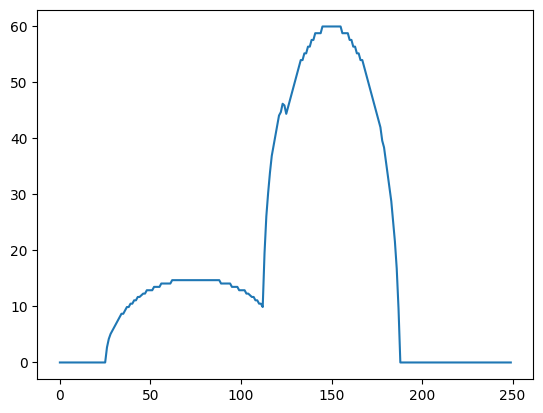

In [15]:
plot_single_degree_radon_transform(radon_transform, 0, theta)

In [16]:
def calculate_inverse_radon_transform(radon_transform: np.ndarray, theta: np.ndarray, interpolation_name: str, filter_name: str) -> np.ndarray:
    side = radon_transform.shape[0]
    iphantom = iradon(radon_transform, 
                    theta, 
                    side, 
                    interpolation=interpolation_name,
                    filter_name=filter_name)
    return iphantom

In [17]:
iphantom = calculate_inverse_radon_transform(radon_transform, theta, "nearest", "ramp")

/tmp/ipykernel_7999/2424215151.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap("hot"),
/tmp/ipykernel_7999/2424215151.py:11: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  plt.colorbar(ax)


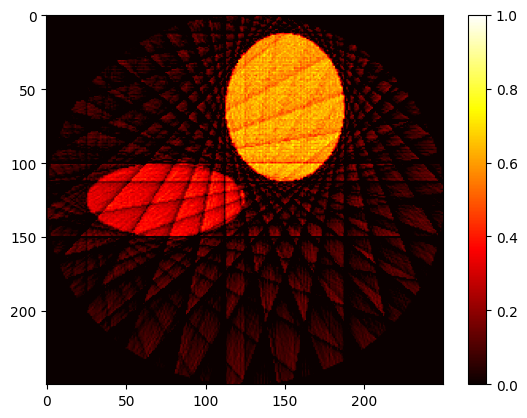

<Figure size 640x480 with 0 Axes>

In [18]:
plot_inverse_radon(iphantom)